# Project:  WeRateDogs Data Wrangling



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#References">References</a></li>    
</ul>

<a id='intro'></a>
## Introduction

**WeRateDogs** is a Twitter account that rates people's dogs with a humorous comment about the dog. In this project i will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean(wrangling and analyze) it by using Python and its libraries.    

First import the libraries we need and then begin with the data wrangling! : )

In [189]:
import pandas as pd
import numpy as np
import requests
import os

<a id='wrangling'></a>
## Data Wrangling

This section consists three parts: 
- Data Gathering 
- Data Assessing 
- Data Cleaning
    



### Gather

 - Local file

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

- Downloading file from the Internet

In [3]:
# Make directory if it doesn't already exist
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
image_predictions_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [5]:
response = requests.get(image_predictions_url)
with open(os.path.join(folder_name,image_predictions_url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)


In [6]:
image_predictions = pd.read_csv('image_predictions/image-predictions.tsv', sep='\t')

- Files from Twitter API  

In [7]:
# you will need retweet count, favorite count and other data you may like.
import tweepy

consumer_key = '***'
consumer_secret = '***'
access_token = '***'
access_secret = '***'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [8]:
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

To query all of the tweet IDs  

write its JSON data to the required `tweet_json.txt` file   

You will then read this file, line by line, to create a pandas DataFrame that you will soon assess and clean. This Reading and Writing JSON to a File in Python [article](https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/) from Stack Abuse, will be useful.

In [ ]:
# List of dictionaries to build and convert to a DataFrame later
import json
from timeit import default_timer as timer

id_list = twitter_archive.tweet_id.values

start = timer()
data = {} 
data['count'] = [] 
count = 0
# tweet.retweet_count,tweet.favorite_count

for tweet_id in id_list:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended')  
        data['count'].append({ 
            'tweet_id': int(tweet_id),
            'retweet_count': int(tweet.retweet_count),
            'favorite_count': int(tweet.favorite_count)
        })
        
        end = timer()
        print('Tweet_id : {}   Time : {} '.format(tweet_id, (end - start)))
        count = count + 1
    
    # Not best practice to catch all exceptions but fine for this short script
    except Exception as e:
        continue
print('Total time : {}   Total tweet : {}'.format((end - start), count))

Tweet_id : 892420643555336193   Time : 0.3140681720000007 
Tweet_id : 892177421306343426   Time : 0.7328357969999999 
Tweet_id : 891815181378084864   Time : 1.2443174670000001 
Tweet_id : 891689557279858688   Time : 1.7449735700000009 
Tweet_id : 891327558926688256   Time : 2.0408942680000006 
Tweet_id : 891087950875897856   Time : 2.47343901 
Tweet_id : 890971913173991426   Time : 2.9854167040000004 
Tweet_id : 890729181411237888   Time : 3.4983775660000003 
Tweet_id : 890609185150312448   Time : 4.013763579000001 
Tweet_id : 890240255349198849   Time : 4.491191376 
Tweet_id : 890006608113172480   Time : 4.779031874000001 
Tweet_id : 889880896479866881   Time : 5.076292050000001 
Tweet_id : 889665388333682689   Time : 5.3710554340000005 
Tweet_id : 889638837579907072   Time : 5.680017312 
Tweet_id : 889531135344209921   Time : 5.992585039 
Tweet_id : 889278841981685760   Time : 6.467263637 
Tweet_id : 888917238123831296   Time : 6.856812214 
Tweet_id : 888804989199671297   Time : 7.16

Tweet_id : 861383897657036800   Time : 64.016172357 
Tweet_id : 861288531465048066   Time : 64.532340168 
Tweet_id : 861005113778896900   Time : 65.040233725 
Tweet_id : 860981674716409858   Time : 65.378759386 
Tweet_id : 860924035999428608   Time : 65.860878888 
Tweet_id : 860563773140209665   Time : 66.371941107 
Tweet_id : 860524505164394496   Time : 66.812255628 
Tweet_id : 860276583193509888   Time : 67.113355855 
Tweet_id : 860184849394610176   Time : 67.405650491 
Tweet_id : 860177593139703809   Time : 67.907816356 
Tweet_id : 859924526012018688   Time : 68.419986646 
Tweet_id : 859851578198683649   Time : 68.936012771 
Tweet_id : 859607811541651456   Time : 69.443860517 
Tweet_id : 859196978902773760   Time : 69.919762405 
Tweet_id : 859074603037188101   Time : 70.229129141 
Tweet_id : 858860390427611136   Time : 70.526180334 
Tweet_id : 858843525470990336   Time : 70.842498932 
Tweet_id : 858471635011153920   Time : 71.13951851899999 
Tweet_id : 858107933456039936   Time : 71

Rate limit reached. Sleeping for: 125


Tweet_id : 856330835276025856   Time : 206.14859460899999 
Tweet_id : 856288084350160898   Time : 206.661266801 
Tweet_id : 856282028240666624   Time : 207.177159323 
Tweet_id : 855862651834028034   Time : 207.684846183 
Tweet_id : 855860136149123072   Time : 207.984677391 
Tweet_id : 855857698524602368   Time : 208.274126545 
Tweet_id : 855851453814013952   Time : 208.586375859 
Tweet_id : 855818117272018944   Time : 209.020193197 
Tweet_id : 855459453768019968   Time : 210.040651455 
Tweet_id : 855245323840757760   Time : 210.552852043 
Tweet_id : 855138241867124737   Time : 211.065133192 
Tweet_id : 854732716440526848   Time : 211.577848387 
Tweet_id : 854482394044301312   Time : 212.092042731 
Tweet_id : 854365224396361728   Time : 212.577536195 
Tweet_id : 854120357044912130   Time : 212.897162342 
Tweet_id : 854010172552949760   Time : 213.17906806599999 
Tweet_id : 853760880890318849   Time : 213.496181432 
Tweet_id : 853639147608842240   Time : 214.038481168 
Tweet_id : 8532999

Tweet_id : 832273440279240704   Time : 276.98981792200004 
Tweet_id : 832215909146226688   Time : 277.524248262 
Tweet_id : 832215726631055365   Time : 278.03916507900004 
Tweet_id : 832088576586297345   Time : 278.36647298500003 
Tweet_id : 832040443403784192   Time : 279.44758776400005 
Tweet_id : 832032802820481025   Time : 279.74260894900004 
Tweet_id : 831939777352105988   Time : 280.065058516 
Tweet_id : 831926988323639298   Time : 280.49336038300004 
Tweet_id : 831911600680497154   Time : 281.11120594100004 
Tweet_id : 831670449226514432   Time : 281.722305102 
Tweet_id : 831650051525054464   Time : 282.233460749 
Tweet_id : 831552930092285952   Time : 282.74680359900003 
Tweet_id : 831322785565769729   Time : 283.142705883 
Tweet_id : 831315979191906304   Time : 283.67693480300005 
Tweet_id : 831309418084069378   Time : 284.163952691 
Tweet_id : 831262627380748289   Time : 284.692454919 
Tweet_id : 830956169170665475   Time : 285.20442514900003 
Tweet_id : 830583320585068544   

Tweet_id : 814530161257443328   Time : 345.62078736700005 
Tweet_id : 814153002265309185   Time : 345.962616195 
Tweet_id : 813944609378369540   Time : 346.44351845600005 
Tweet_id : 813910438903693312   Time : 346.952347867 
Tweet_id : 813812741911748608   Time : 347.465713773 
Tweet_id : 813800681631023104   Time : 347.762407352 
Tweet_id : 813217897535406080   Time : 348.28368153900004 
Tweet_id : 813202720496779264   Time : 348.610867149 
Tweet_id : 813187593374461952   Time : 348.984002963 
Tweet_id : 813172488309972993   Time : 349.51179802800004 
Tweet_id : 813157409116065792   Time : 350.023519453 
Tweet_id : 813142292504645637   Time : 350.53583194400005 
Tweet_id : 813130366689148928   Time : 351.051686629 
Tweet_id : 813127251579564032   Time : 351.55951843900004 
Tweet_id : 813112105746448384   Time : 352.07174439700003 
Tweet_id : 813096984823349248   Time : 352.58258064 
Tweet_id : 813081950185472002   Time : 353.09583381000004 
Tweet_id : 813066809284972545   Time : 353.

Tweet_id : 793614319594401792   Time : 415.766779267 
Tweet_id : 793601777308463104   Time : 416.14393051900004 
Tweet_id : 793500921481273345   Time : 416.68808497900005 
Tweet_id : 793286476301799424   Time : 417.183608567 
Tweet_id : 793271401113350145   Time : 417.71580380600005 
Tweet_id : 793256262322548741   Time : 418.223292393 
Tweet_id : 793241302385262592   Time : 418.82369185000005 
Tweet_id : 793226087023144960   Time : 419.12855288400004 
Tweet_id : 793210959003287553   Time : 419.555510034 
Tweet_id : 793195938047070209   Time : 419.91936597600005 
Tweet_id : 793180763617361921   Time : 420.37454104000005 
Tweet_id : 793165685325201412   Time : 420.975651259 
Tweet_id : 793150605191548928   Time : 421.496254666 
Tweet_id : 793135492858580992   Time : 421.88334752000003 
Tweet_id : 793120401413079041   Time : 422.32331900900004 
Tweet_id : 792913359805018113   Time : 422.93456825100003 
Tweet_id : 792883833364439040   Time : 423.306429523 
Tweet_id : 792773781206999040   

Tweet_id : 775733305207554048   Time : 484.91547681500003 
Tweet_id : 775729183532220416   Time : 485.20742312500005 
Tweet_id : 775364825476165632   Time : 485.514260518 


In [ ]:
with open('tweet_json.txt', 'w') as outfile:  
    json.dump(data, outfile)

In [ ]:
df_list = []
with open('tweet_json.txt') as json_file:  
    data = json.load(json_file)
    for p in data['count']:
        df_list.append({'tweet_id':int(p['tweet_id']),
                        'retweet_count':int(p['retweet_count']),
                        'favorite_count':int(p['favorite_count'])})        

In [ ]:
# Create DataFrame from list of dictionaries
df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
df

In [ ]:
df.to_csv('API_data.csv', index = False)

### Assess

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
%matplotlib inline

In [38]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
addition_data = pd.read_csv('API_data.csv')

- twitter_archive

In [39]:
twitter_archive.shape

(2356, 17)

In [40]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
425,821421320206483457,NaN,NaN,2017-01-17 18:17:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sampson. He just gradua...,7.823059e+17,4.196984e+09,2016-10-01 19:47:08 +0000,https://twitter.com/dog_rates/status/782305867...,12,10,Sampson,doggo,None,None,None
522,809808892968534016,NaN,NaN,2016-12-16 17:14:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Maximus. His face is st...,7.939622e+17,4.196984e+09,2016-11-02 23:45:19 +0000,https://twitter.com/dog_rates/status/793962221...,12,10,Maximus,None,None,None,None
1065,740711788199743490,NaN,NaN,2016-06-09 01:07:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we are witnessing the touchdown of a pupn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740711788...,9,10,None,None,None,None,None
251,844979544864018432,7.590995e+17,4.196984e+09,2017-03-23 18:29:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",PUPDATE: I'm proud to announce that Toby is 23...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/844979544...,13,10,None,None,None,None,None
2162,669393256313184256,NaN,NaN,2015-11-25 05:52:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Ronduh. She's a Finnish Checkered Blitzkr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669393256...,10,10,Ronduh,None,None,None,None


In [41]:
twitter_archive.retweeted_status_id.dropna().count()

181

181 records are retweeted.

In [42]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

*Data type*
- timestamp : string to datatime
- rating_numerator : int to float
- rating_denominator : int to float

In [43]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [44]:
twitter_archive.tweet_id.duplicated().sum()

0

In [45]:
type(twitter_archive.timestamp[0])

str

In [46]:
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
Cooper       11
Penny        10
Tucker       10
Lola         10
Winston       9
Bo            9
Sadie         8
the           8
an            7
Daisy         7
Bailey        7
Toby          7
Buddy         7
Koda          6
Milo          6
Dave          6
Scout         6
Bella         6
Jax           6
Stanley       6
Leo           6
Rusty         6
Oscar         6
Jack          6
Finn          5
           ... 
Petrick       1
Linus         1
Sailer        1
Kaiya         1
Travis        1
Meatball      1
Cheryl        1
Nugget        1
Tiger         1
Jimbo         1
Cuddles       1
Storkson      1
Dot           1
Obi           1
Jomathan      1
Harnold       1
Pip           1
Ron           1
Jeremy        1
Stefan        1
River         1
Kulet         1
Lilah         1
Snoop         1
Lambeau       1
Creg          1
Gustav        1
Pluto         1
Duddles       1
Callie        1
Name: name, Length: 957,

In [47]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [48]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

- image_predictions

In [49]:
image_predictions.shape

(2075, 12)

In [50]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
148,668633411083464705,https://pbs.twimg.com/media/CUd2ieCUcAAexyT.jpg,1,Pekinese,0.589011,True,Shih-Tzu,0.390987,True,Japanese_spaniel,0.003310,True
1735,821765923262631936,https://pbs.twimg.com/media/C2d_vnHWEAE9phX.jpg,1,golden_retriever,0.980071,True,Labrador_retriever,0.008758,True,Saluki,0.001806,True
1755,824796380199809024,https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg,2,gas_pump,0.676439,False,harvester,0.049995,False,swing,0.044660,False
1117,725786712245440512,https://pbs.twimg.com/media/ChKDKmIWIAIJP_e.jpg,1,chow,0.335761,True,Samoyed,0.167173,True,kuvasz,0.145715,True
267,670807719151067136,https://pbs.twimg.com/media/CU8v-rdXIAId12Z.jpg,1,Old_English_sheepdog,0.958035,True,Sealyham_terrier,0.013892,True,Border_collie,0.004601,True


In [51]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [52]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [53]:
image_predictions.duplicated().sum()

0

In [54]:
image_predictions.tweet_id.duplicated().sum()

0

In [55]:
image_predictions.jpg_url.duplicated().sum()

66

- addition_data

In [56]:
addition_data.shape

(2337, 3)

In [57]:
addition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
tweet_id          2337 non-null int64
retweet_count     2337 non-null int64
favorite_count    2337 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [58]:
addition_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.337000e+03,2337.000000,2337.000000
mean,7.420692e+17,2873.370561,7834.053915
std,6.824243e+16,4853.666866,12145.569567
min,6.660209e+17,1.000000,0.000000
25%,6.783345e+17,578.000000,1357.000000
50%,7.185406e+17,1343.000000,3414.000000
75%,7.986825e+17,3350.000000,9593.000000
max,8.924206e+17,82329.000000,162004.000000


In [59]:
addition_data.sample(5)

,tweet_id,retweet_count,favorite_count
2312,666353288456101888,71,211
32,885984800019947520,6530,31623
1712,679844490799091713,800,2443
921,753039830821511168,22200,38665
2018,671561002136281088,7302,12816


#### Quality
##### `twitter_archive` table
- Some records of **rating_denominator** is not the Standard rating:10
- Some records of **rating_numerator** is way to big than 10
- Extract the phone number and email variables from the contact column using regular expressions and pandas' str.extract method
- Data type:  
    timestamp : string to datatime  
    rating_numerator : int to float  
    rating_denominator : int to float
- Some ratings are not properly extracted
- Some dog names are apparently wrong.Eg: 'a', 'the', 'an'.
- Based on the 'text', the photo of tweet_id = '751583847268179968' is not a dog, but we will check it out.

##### `image_predictions` table
- Missing records (2075 instead of 2356)***(can't add yet)***
- Delete unuseful conlumns : img_num
- Lowercase the breeds of dogs.
- Duplicated jpg url in the image predictions.

#### Tidiness
- Delete unuseful conlumns : in_reply_to_status_id,in_reply_to_user_id, expanded_urls, retweeted_status_user_id,retweeted_status_timestamp
- 181 records are retweeted
- One variable in four columns( Melt the doggo, floofer, pupper, puppo columns to a type column ) in `twitter_archive` table
- Merge `addition_data` and `twitter_archive` tables
- Multiple dog stages : Some tweets have two dogs in one tweet and some id's dog has more than one dag-stages.

### Clean

In [607]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
addition_data_clean = addition_data.copy()

#### 1 Tidiness
##### Define
Delete unuseful conlums using *drop* method.

##### Code

In [608]:
twitter_archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None


In [609]:
twitter_archive_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id', 'expanded_urls', 'retweeted_status_timestamp'], inplace = True)

In [610]:
image_predictions_clean.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [611]:
image_predictions_clean.drop(columns =['img_num'], inplace = True)

##### Test

In [612]:
twitter_archive_clean.head(1)

,tweet_id,timestamp,source,text,retweeted_status_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,13,10,Phineas,None,None,None,None


In [613]:
image_predictions_clean.head(1)

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


##### Define
Delete the 181 retweeted records using _dropna( )_ method. 

##### Code

In [614]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

##### Test

In [615]:
twitter_archive_clean['retweeted_status_id'].sum()

0.0

##### Define
Melt the _doggo_, _floofer_, _pupper_ and _puppo_ columns to _stage_ column and _value_ column using **pd.melt** method. 

##### Code

In [616]:
twitter_archive_clean.head(1)

,tweet_id,timestamp,source,text,retweeted_status_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,13,10,Phineas,None,None,None,None


In [617]:
twitter_archive_clean.shape

(2175, 12)

In [618]:
df = pd.melt(twitter_archive_clean, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
                                                               'rating_denominator', 'name', 'retweeted_status_id'],
                           var_name='stage', value_name='value')

In [619]:
stage_data = df[df.value != "None"][['tweet_id','value']]
stage_data.sample(5)

,tweet_id,value
403,813910438903693312,doggo
5514,704761120771465216,pupper
367,819924195358416896,doggo
814,748932637671223296,doggo
5310,728035342121635841,pupper


In [620]:
stage_data.value.value_counts()

pupper     234
doggo      87 
puppo      25 
floofer    10 
Name: value, dtype: int64

In [621]:
stage_data.tweet_id.duplicated().sum()

12

In [622]:
twitter_archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace = True)

In [623]:
twitter_archive_clean = pd.merge(twitter_archive_clean, stage_data,
                            on=['tweet_id'], how='left')
twitter_archive_clean.drop(columns=['retweeted_status_id'], inplace = True)

In [624]:
twitter_archive_clean.rename(columns={'value':'stage'}, inplace = True)
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.tweet_id != 'None']

##### Test

In [625]:
pd.options.display.max_colwidth = 200
twitter_archive_clean[twitter_archive_clean.tweet_id.duplicated()][['tweet_id','text','stage']]

,tweet_id,text,stage
166,855851453814013952,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,puppo
174,854010172552949760,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",floofer
385,817777686764523521,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",pupper
446,808106460588765185,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,pupper
472,802265048156610565,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",pupper
480,801115127852503040,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,pupper
574,785639753186217984,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,pupper
601,781308096455073793,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",pupper
731,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",pupper
791,751583847268179968,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,pupper


**Some tweets have two stages : doggo and pupper(or floofer or puppo). One reason is that there are two 'stage descriptions' in one text(we choose the more representative one); The other reason is that there are two rating dogs in one tweet(we leave it that way). Now let's fixt that!**

##### Define
Fix multiple dog stages by changing the single stage to 'multiple' while drop the duplicated columns.
##### Code

In [626]:
id_duplicate = [166, 174, 385, 446, 472, 480, 574, 601, 731, 791, 896, 947]
for i in id_duplicate:
    twitter_archive_clean.iloc[i, twitter_archive_clean.columns.get_loc('stage')] = 'multiple'

In [627]:
for i in id_duplicate:
    twitter_archive_clean.drop(i-1, inplace = True)

##### Test

In [628]:
twitter_archive_clean[twitter_archive_clean.stage == 'multiple']

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage
166,855851453814013952,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,13,10,None,multiple
174,854010172552949760,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",11,10,None,multiple
385,817777686764523521,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",13,10,Dido,multiple
446,808106460588765185,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,12,10,None,multiple
472,802265048156610565,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",11,10,None,multiple
480,801115127852503040,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,12,10,Bones,multiple
574,785639753186217984,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,10,10,Pinot,multiple
601,781308096455073793,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",12,10,None,multiple
731,759793422261743616,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",12,10,Maggie,multiple
791,751583847268179968,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,5,10,None,multiple


In [629]:
twitter_archive_clean.tweet_id.duplicated().sum()

0

In [630]:
twitter_archive_clean.stage.value_counts()

pupper      224
doggo        75
puppo        24
multiple     12
floofer       9
Name: stage, dtype: int64

In [631]:
twitter_archive_clean.shape

(2175, 8)

##### Define
Merge the  `addition_data_clean` to the `twitter_archive_clean` table by joining on tweet_id.
##### Code

In [632]:
twitter_archive_clean = pd.merge(twitter_archive_clean, addition_data_clean,
                            on=['tweet_id'], how='left')

##### Test

In [633]:
twitter_archive_clean.sample(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
1804,672964561327235073,2015-12-05 02:23:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Terry. He's a Toasty Western Sriracha. Doubles as a table. Great for parties. 10/10 would highly recommend https://t.co/1ui7a1ZLTT,10,10,Terry,NaN,648.0,1423.0


In [634]:
twitter_archive_clean.tweet_id.duplicated().sum()

0

#### 2 Quality

#### `twitter_archive` table

- Some dog names are apparently wrong
- Based on the 'text', the photo of tweet_id = '751583847268179968' is not a dog, but we will check it out.

#### `twitter_archive` table

##### Define
**Outliers**: In `twitter_archive` table, Some records of rating_denominator is not the Standard rating - 10 while some records of rating_numerator is way too big than 10. Delete the 'not 10 rating_denominator' and rating_numerator which are **not** within the range of **0~20**.
##### Code

In [635]:
twitter_archive_clean.sample(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
573,784517518371221505,2016-10-07 22:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Frankie. He has yet to learn how to control his tongue. 11/10 maybe one day https://t.co/p6fgYe2dB6,11,10,Frankie,NaN,2735.0,9441.0


In [636]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.rating_denominator == 10]

In [637]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.rating_numerator <= 20]

##### Test

In [638]:
twitter_archive_clean.rating_numerator.value_counts()

12    500
10    442
11    425
13    307
9     155
8      98
7      53
14     43
5      36
6      32
3      19
4      15
2       9
1       7
0       2
15      1
17      1
Name: rating_numerator, dtype: int64

In [639]:
twitter_archive_clean.rating_denominator.value_counts()

10    2145
Name: rating_denominator, dtype: int64

##### Define
**Typo**: Change timestamp's type into datetime using pd.to_datetime( )
##### Code

In [640]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean.timestamp) 

##### Test

In [641]:
twitter_archive_clean.timestamp.dtype

datetime64[ns, UTC]

##### Define
**Typo**: Change rating's type to 'float' using astype function.
##### Code

In [642]:
twitter_archive_clean.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,NaN,8174.0,37511.0


In [643]:
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype('float')
twitter_archive_clean.rating_denominator = twitter_archive_clean.rating_denominator.astype('float')

##### Test

In [644]:
type(twitter_archive_clean.rating_numerator[0]),type(twitter_archive_clean.rating_denominator[0])

(numpy.float64, numpy.float64)

##### Define
Extracted ratings properly from the 'text' using regular expressions and pandas' str.extract method.
##### Code

In [645]:
twitter_archive_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

##### Test

In [646]:
twitter_archive_clean.rating_numerator.value_counts()

12      500
10      442
11      425
13      307
9       155
8        98
7        52
14       43
5        34
6        32
3        19
4        15
2         9
1         7
0         2
17        1
15        1
007       1
9.5       1
13.5      1
Name: rating_numerator, dtype: int64

##### Define
wrong name: Change the dog names who are 'a', 'the' and 'an' into "None".
##### Code

In [647]:
twitter_archive_clean[twitter_archive_clean.name == 'a'] = 'None'
twitter_archive_clean[twitter_archive_clean.name == 'an'] = 'None'
twitter_archive_clean[twitter_archive_clean.name == 'the'] = 'None'

##### Test

In [648]:
twitter_archive_clean.name.value_counts()

None         726
Charlie       11
Lucy          11
Cooper        10
Oliver        10
Penny          9
Tucker         9
Sadie          8
Winston        8
Lola           8
Toby           7
Daisy          7
Bailey         6
Koda           6
Oscar          6
Stanley        6
Jax            6
Bella          6
Bo             6
Scout          5
Milo           5
Bentley        5
Buddy          5
Leo            5
Dave           5
Rusty          5
Chester        5
Louis          5
Oakley         4
Sammy          4
            ... 
Leonidas       1
Henry          1
Cuddles        1
Betty          1
Ester          1
Ivar           1
Scruffers      1
Grady          1
Lassie         1
Bayley         1
Shawwn         1
Ulysses        1
Milky          1
Carly          1
Jed            1
Stephan        1
Brockly        1
Jeb            1
Diogi          1
Samsom         1
Brutus         1
Chuck          1
Ricky          1
Grizzwald      1
Ken            1
Chef           1
Berb           1
Leonard       

In [649]:
twitter_archive_clean[twitter_archive_clean.name == 'a']

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count


##### Define
Check if tweet_id = '751583847268179968' has any dogs in the photo by importing _Image_ from _IPython.display_.   
If there is no dog in the picture, delete it from the dataframe.
##### Code

In [650]:
twitter_archive_clean.query('tweet_id == 751583847268179968').text

781    Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8
Name: text, dtype: object

In [651]:
image_predictions_clean.query('tweet_id == 751583847268179968')

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1292,751583847268179968,https://pbs.twimg.com/media/Cm4phTpWcAAgLsr.jpg,dalmatian,0.868304,True,studio_couch,0.059623,False,snow_leopard,0.013876,False


In [652]:
image_predictions_clean.query('tweet_id == 751583847268179968').jpg_url

1292    https://pbs.twimg.com/media/Cm4phTpWcAAgLsr.jpg
Name: jpg_url, dtype: object

<br/> 
Embed image in jupyter via HTML(code cell)

##### Test

In [653]:
from IPython.display import Image
Image(url = "https://pbs.twimg.com/media/Cm4phTpWcAAgLsr.jpg", width=200, height=200)

Hahaha no wonder why people complain that there are 'no' dogs in the picture!!  
Good hider!

##### `image_predictions_clean` table  

##### Define
Lowercase the breeds of dogs.
##### Code

In [654]:
np.random.seed(5)
image_predictions_clean.sample(5)

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
675,683449695444799489,https://pbs.twimg.com/media/CXwZ3pbWsAAriTv.jpg,Lakeland_terrier,0.303512,True,soft-coated_wheaten_terrier,0.211424,True,golden_retriever,0.170725,True
2058,888917238123831296,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,golden_retriever,0.714719,True,Tibetan_mastiff,0.120184,True,Labrador_retriever,0.105506,True
953,705102439679201280,https://pbs.twimg.com/media/CckG63qUsAALbIr.jpg,collie,0.457672,True,chow,0.279101,True,Pomeranian,0.076922,True
247,670668383499735048,https://pbs.twimg.com/media/CU6xVkbWsAAeHeU.jpg,banana,0.107317,False,orange,0.099662,False,bagel,0.089033,False
1384,765719909049503744,https://pbs.twimg.com/media/CqBiMAgWAAEJKgI.jpg,golden_retriever,0.969518,True,Labrador_retriever,0.021696,True,Border_terrier,0.002075,True


In [655]:
image_predictions_clean.p1 = image_predictions_clean.p1.str.lower()
image_predictions_clean.p2 = image_predictions_clean.p2.str.lower()
image_predictions_clean.p3 = image_predictions_clean.p3.str.lower();

##### Test

In [656]:
image_predictions_clean.p1.str.isupper().sum(),image_predictions_clean.p2.str.isupper().sum(),image_predictions_clean.p3.str.isupper().sum()

(0, 0, 0)

### Storing the wrangled data

In [657]:
# Store the clean DataFrame(s) in a CSV file with the main one named 'twitter_archive_master.csv'
twitter_archive_clean.to_csv('twitter_archive_master.csv', index = False)
image_predictions_clean.to_csv('image_predictions_master.csv', index = False)

<a id='eda'></a>
## Exploratory Data Analysis  
<br/> 
### Q1: What's the most popular dog name?

In [658]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sb
df = pd.read_csv('twitter_archive_master.csv')
df1 = pd.read_csv('image_predictions_master.csv')

In [659]:
df.name.value_counts()[:10]

None       726
Charlie     11
Lucy        11
Cooper      10
Oliver      10
Penny        9
Tucker       9
Sadie        8
Winston      8
Lola         8
Name: name, dtype: int64

According to what we have collected, **'Charlie'** and **'Lucy'** are the most popular dog name! ( _Althogh 726 records have no shown name_ )  

Right following them, the dog names **'Oliver', 'Cooper'** are also popular !  

### Q2: Who is the top one rate dog ?

In [660]:
df.rating_numerator.value_counts()

12      495
10      426
11      414
13      304
9       143
8        92
None     67
7        46
14       42
5        33
6        31
3        18
4        12
2         8
1         7
0         2
15        1
17        1
007       1
9.5       1
13.5      1
Name: rating_numerator, dtype: int64

In [661]:
df_rate = df[df.rating_numerator != 'None'].rating_numerator
df_rate = df_rate.astype('float')
df_rate.dtype

dtype('float64')

In [662]:
df_rate.value_counts()

12.0    495
10.0    426
11.0    414
13.0    304
9.0     143
8.0      92
7.0      47
14.0     42
5.0      33
6.0      31
3.0      18
4.0      12
2.0       8
1.0       7
0.0       2
15.0      1
17.0      1
13.5      1
9.5       1
Name: rating_numerator, dtype: int64

In [663]:
df_rate.describe()

count    2078.000000
mean       10.672281
std         2.171878
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        17.000000
Name: rating_numerator, dtype: float64

No handles with labels found to put in legend.


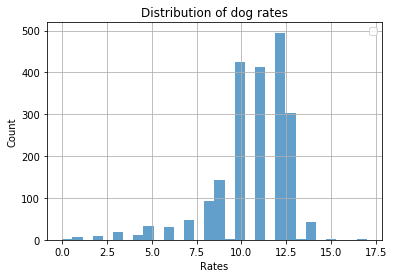

In [664]:
df_rate.hist(bins = 30, alpha = .7)
plt.title('Distribution of dog rates')
plt.xlabel('Rates')
plt.ylabel('Count')
plt.legend()    
plt.show();

As is shown above, the mean of the rate is 10.67, max rate is 17 and min rate is 0. Most of the rates are between 10 to 13.

</b>

One dog get the highst rate (17) and two dogs get the second highest rate (15). Now let's have a look of the top rate dog!

In [665]:
df[df.rating_numerator == '17']

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
52,881633300179243008,2017-07-02 21:58:53+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17,10,None,NaN,7.0,121.0


According to the text :"17/10 is an emotional impulse rating. More like 13/10s" and the low retweet,favorite counts. This rate is not 17, is actually 13. So let's fix it.

In [666]:
df.loc[52].rating_numerator = '13'

In [667]:
df[df.rating_numerator == '17']

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count


In [668]:
df[df.rating_numerator == '15']

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
244,838085839343206401,2017-03-04 17:56:49+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10,15,10,None,NaN,1.0,146.0


In [669]:
df1[df1.tweet_id == 838085839343206401]

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


Unfortunately we **cannot find the pictures, names or stages** of this top rate dog.  

However the rates sometimes can be emotional, probably **the retweet counts and favorite counts are more reasonable** since the top rate ones don't really have a high retweet counts(or favorite counts).

### Q3: Who are the top retweet count and favorite count dogs ?

In [670]:
df.retweet_count.describe(), df.favorite_count.describe()

(count     2141
 unique    1634
 top       None
 freq        67
 Name: retweet_count, dtype: object, count     2141
 unique    1923
 top       None
 freq        67
 Name: favorite_count, dtype: object)

In [671]:
retweet_count = df.retweet_count[df.retweet_count != 'None']
favorite_count = df.favorite_count[df.favorite_count != 'None']

In [672]:
retweet_count = retweet_count.astype('float')

In [673]:
favorite_count = favorite_count.astype('float')

In [674]:
retweet_count.dropna(inplace = True)

In [675]:
favorite_count.dropna(inplace = True)

In [676]:
type(retweet_count[0]), type(favorite_count[0])

(numpy.float64, numpy.float64)

In [677]:
retweet_count.describe(), favorite_count.describe()

(count     2074.000000
 mean      2641.189489
 std       4659.712062
 min          1.000000
 25%        584.000000
 50%       1284.500000
 75%       3014.500000
 max      82329.000000
 Name: retweet_count, dtype: float64, count      2074.000000
 mean       8627.198168
 std       12532.935182
 min          51.000000
 25%        1921.500000
 50%        3940.500000
 75%       10774.000000
 max      162004.000000
 Name: favorite_count, dtype: float64)

In [678]:
df[df.retweet_count == '82329.0'].tweet_id, df[df.favorite_count == '162004.0'].tweet_id

(851    744234799360020481
 Name: tweet_id, dtype: object, 851    744234799360020481
 Name: tweet_id, dtype: object)

The top retweet count and favorite count belongs to the **same** tweet_id!!

In [679]:
df[df.tweet_id == '744234799360020481'].stage

851    doggo
Name: stage, dtype: object

In [680]:
df1[df1.tweet_id == 744234799360020481].p1

1221    labrador_retriever
Name: p1, dtype: object

In [681]:
pd.set_option('display.max_colwidth', -1)
df1[df1.tweet_id == 744234799360020481].jpg_url

1221    https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg
Name: jpg_url, dtype: object

In [682]:
Image(url = 'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg', width=200, height=200)

Look at him(or her)!! A labrador doggo relaxing siwmming in the pool! No wonder he got so many likes !

### Q4: The relationship bewteen Retweet and Favorite Counts.

In [683]:
df_sub = df[df.retweet_count != 'None']
df_sub = df_sub[df_sub.favorite_count != 'None']

In [684]:
df_sub.retweet_count = df_sub.retweet_count.astype('float')
df_sub.favorite_count = df_sub.favorite_count.astype('float')
type(df_sub.retweet_count[0]), type(df_sub.favorite_count[0])

(numpy.float64, numpy.float64)

In [685]:
df_sub.retweet_count.dropna(inplace = True)
df_sub.favorite_count.dropna(inplace = True)
df_sub.favorite_count = df_sub.favorite_count[df_sub.favorite_count != 0]

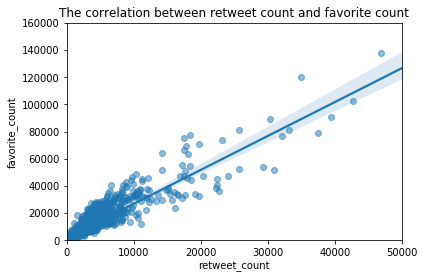

In [686]:
sb.regplot(data = df_sub, x = 'retweet_count', y = 'favorite_count', x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/2});
plt.xlim([0,50000]);
plt.ylim([0,160000]);
plt.title('The correlation between retweet count and favorite count');

The Scatterplot shows a strong, positive linear association between retweet count and favorite count.

### Q5: What's the Retweet and Favorite Counts of dogs in different stages?

In [687]:
df_stage = df_sub
df_stage.dropna(inplace = True)

In [688]:
df_stage_mean = df_stage.groupby('stage').mean()
df_stage_mean

,retweet_count,favorite_count
stage,,
doggo,6177.960000,17688.173333
floofer,3858.777778,10463.777778
multiple,4950.750000,15422.416667
pupper,2270.870968,6772.668203
puppo,6032.333333,20643.875000


In [689]:
df_stage_mean = df_stage_mean.reset_index()
df_stage_mean

,stage,retweet_count,favorite_count
0,doggo,6177.960000,17688.173333
1,floofer,3858.777778,10463.777778
2,multiple,4950.750000,15422.416667
3,pupper,2270.870968,6772.668203
4,puppo,6032.333333,20643.875000


In [690]:
df_stage_mean = df_stage_mean.melt(id_vars = ['stage'], value_vars = ['retweet_count', 'favorite_count'], var_name = 'sort', value_name = 'mean_count')

In [691]:
df_stage_mean

,stage,sort,mean_count
0,doggo,retweet_count,6177.960000
1,floofer,retweet_count,3858.777778
2,multiple,retweet_count,4950.750000
3,pupper,retweet_count,2270.870968
4,puppo,retweet_count,6032.333333
5,doggo,favorite_count,17688.173333
6,floofer,favorite_count,10463.777778
7,multiple,favorite_count,15422.416667
8,pupper,favorite_count,6772.668203
9,puppo,favorite_count,20643.875000


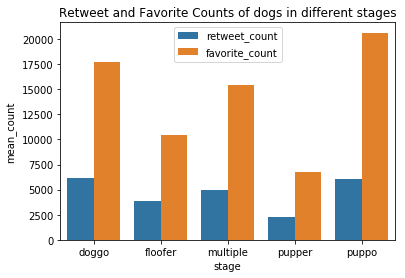

In [692]:
sb.barplot(data = df_stage_mean, x = 'stage', y = 'mean_count', hue= 'sort')
plt.title('Retweet and Favorite Counts of dogs in different stages')
 
L = plt.legend()
L.get_texts()[0].set_text('reweet')
L.get_texts()[1].set_text('favorite')
plt.legend(loc='upper center');

On average, puppo and doggo are more popular, get more retweet and favorite.  

Pupper(the big guys) which are not so cute as the small ones get the least retweet and favorite counts.

<a id='References'></a>
## References
1 [Embed image in jupyter](https://stackoverflow.com/questions/32370281/how-to-embed-image-or-picture-in-jupyter-notebook-either-from-a-local-machine-o)  
2 [Reading and Writing JSON to a File in Python](https://jsonformatter.curiousconcept.com)  
3 [Change legend label text](https://stackoverflow.com/questions/23037548/change-main-plot-legend-label-text)

In [694]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])  

0